<a href="https://colab.research.google.com/github/hpoddar2810/Data_Science_projects/blob/master/Prime_Diabeters_Prediction/PrimaDiabetespynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module Import

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Import and Basic Exploration

In [ ]:
data = pd.read_csv('diabetes.csv')#, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
print(data.shape)

(768, 9)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Describtion
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### columns:
* Pregnencies: Number of times pregnent (Integer)
* Glucose: 
 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dL) 
 - Normal Glucose level for Non-diabetes person is between 70-130 mg/dL (Google)
* BloodPressure :
 - Diastolic blood pressure (mm Hg)
 - Normal lower than 80

* SkinThickness :
 - Triceps skin fold thickness (mm)
 - According to certain researches skinthickess is related to Diabetes
 
* Insulin
 - 2-Hour serum insulin (mu U/ml)
 - low insulin : may have type 2 diabetes
 - high insulin : may have type 1 diabetes
* BMI
 - Body mass index (weight in kg/(height in m)^2)
 - Normal 18.5 - 24.9
 - As the BMI increases Female have more chances of diabetes than male
* DiabetesPedigreeFunction 
 - Diabetes pedigree function
 - According to http://www.personal.kent.edu/~mshanker/personal/Zip_files/sar_2000.pdf, the diabetes pedigree function provides “a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.”
* Age
 - Age (years)
 - Normally it is seen that as the age increases chance of diabetes increase
* Outcome
 - If a person have diabetes or not (0/1)
 - This is our output variable

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> * Max value of Pregnancies is 17, I thinks it's not normal and 25% sample have more than 6 pregnancies which is pretty much more.
> * What does 0 means in Glucose, BloodPressure, Skinthickness, Insulin, BMI means?
 - it doesn't make sense of have this as 0 
> * Even Skinthickness and Insulin have more than 25% of value equal to 0. Will have to look into it in future

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Univariate Analysis

In [ ]:
columns=data.columns

In [ ]:
def distplot(column):
  df = data[column]
  sns.distplot(df)
  plt.show()


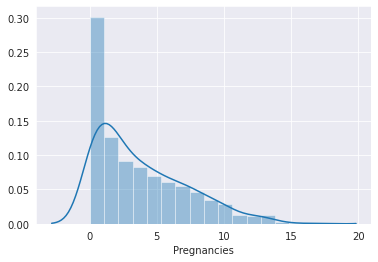

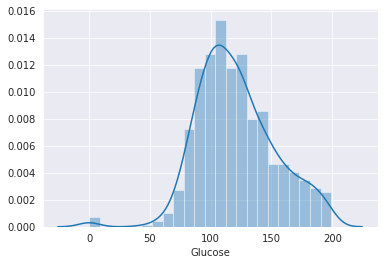

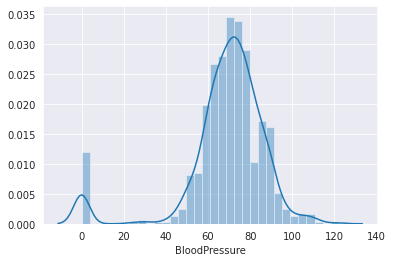

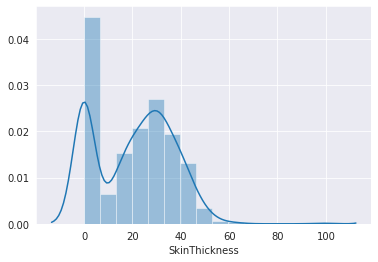

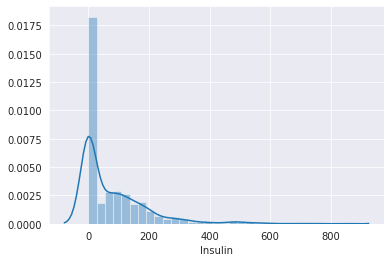

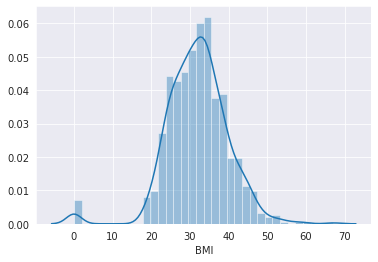

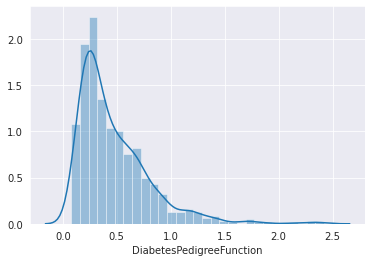

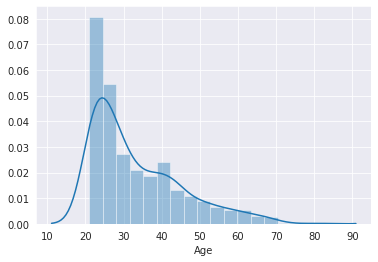

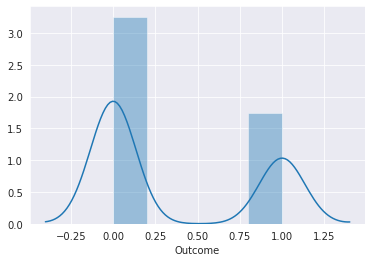

In [ ]:
sns.set_style('darkgrid')
for column in columns:
  distplot(column)

In [ ]:
df = data[(data.Glucose == 0) | (data.BloodPressure==0) | (data.Insulin == 0) | (data.SkinThickness==0) | (data.BMI ==0)]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,4.412234,119.087766,67.481383,11.561170,0.297872,30.852394,0.418529,35.718085,0.367021
std,3.440583,33.036388,24.459810,15.713823,4.737549,8.549205,0.307390,12.740708,0.482635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.475000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,0.000000,0.000000,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.250000,0.000000,35.625000,0.554750,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,89.000000,52.900000,1.893000,72.000000,1.000000


## Bivariate Analysis

In [ ]:
def box(column):
  sns.boxplot(x='Outcome', y=column, data=data)
  plt.show()

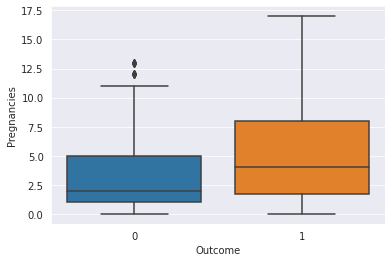

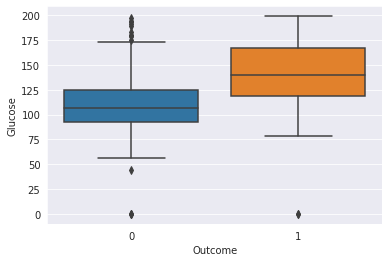

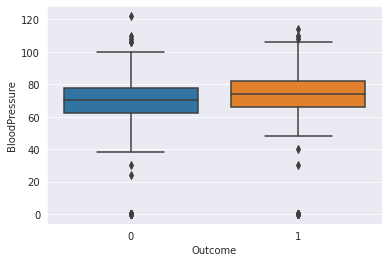

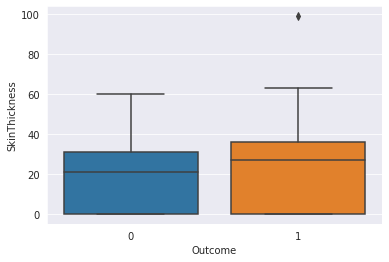

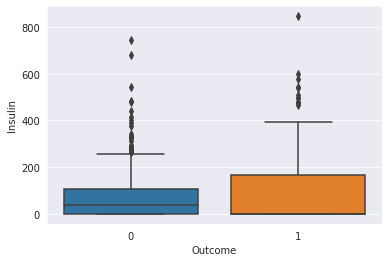

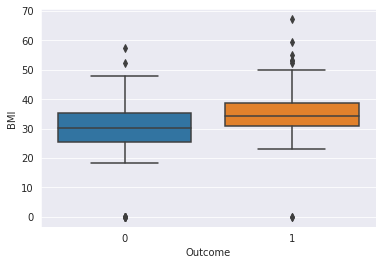

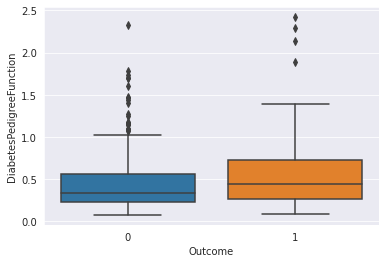

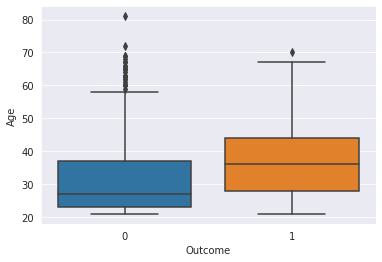

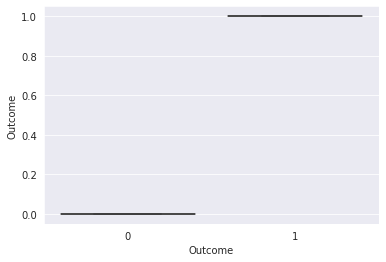

In [ ]:
for column in columns:
  box(column)

In [ ]:
def violin(column):
  sns.violinplot(x='Outcome', y=column, data=data)
  plt.show()

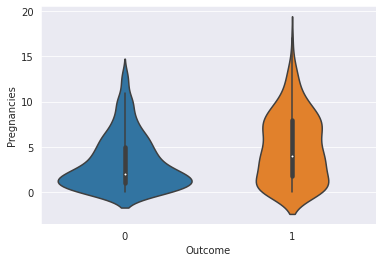

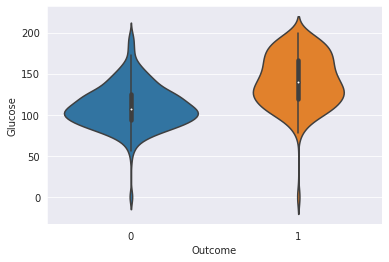

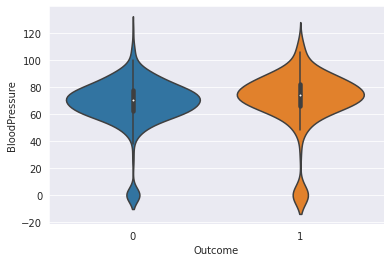

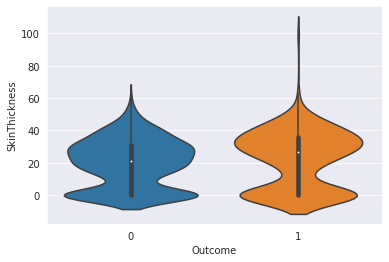

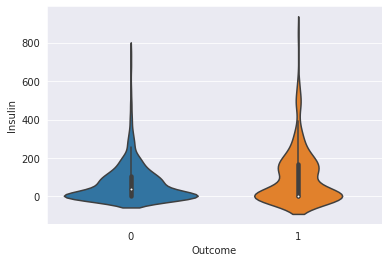

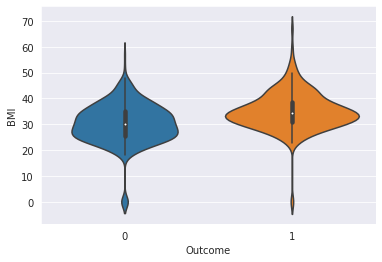

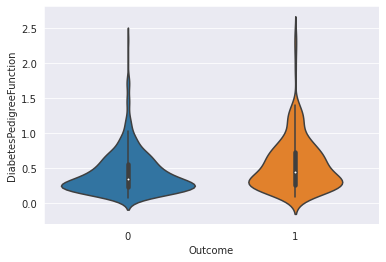

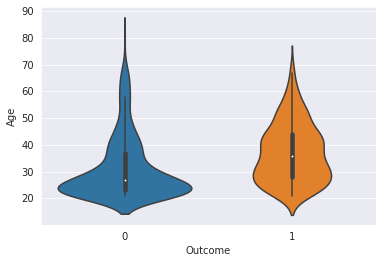

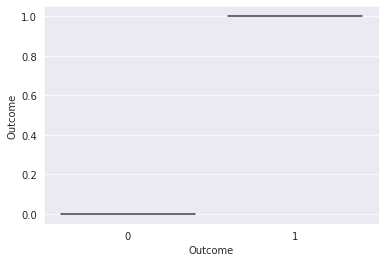

In [ ]:
for column in columns:
  violin(column)

In [ ]:
def scatter(x, y):
  sns.scatterplot(x=x, y=y, hue='Outcome', data=data, marker='x')
  plt.show()

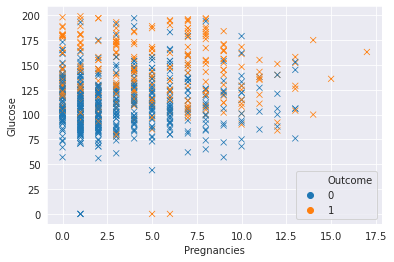

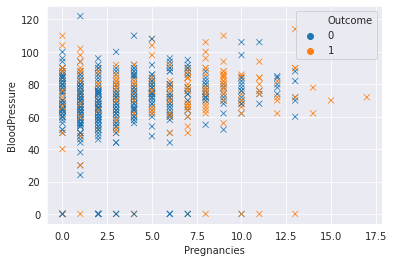

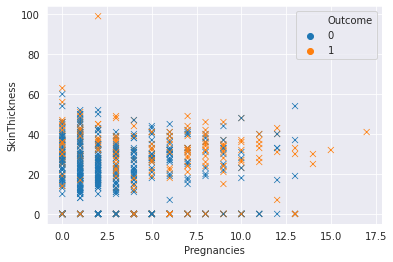

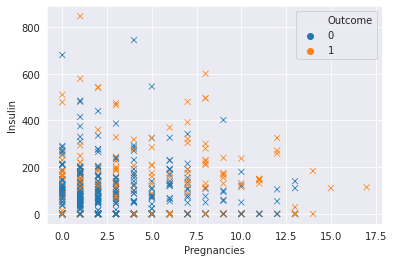

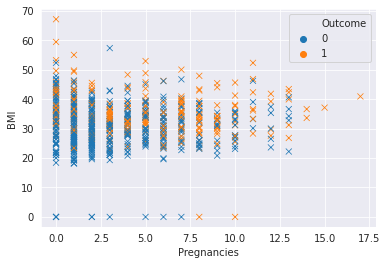

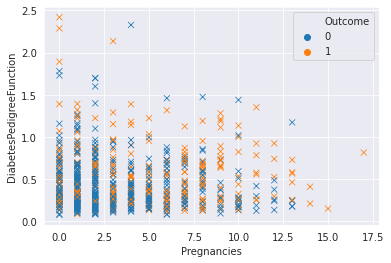

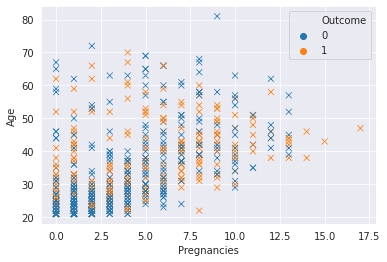

In [ ]:
for i in range(1,8):
  scatter(columns[0], columns[i])

### Count number of O's in each column

In [ ]:
df = pd.DataFrame(index=data.columns)
for column in columns:
  df.loc[column, 'count'] = ateint(len(data[data[column] == 0]))
df

,count
Pregnancies,111.0
Glucose,5.0
BloodPressure,35.0
SkinThickness,227.0
Insulin,374.0
BMI,11.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,500.0


>> * Pregnancies value can be of 0 so we don't need 
>> * While other columns except Outcome should't have 0.
>> * So we are going to change the 0 with mean of that column in that class.

In [ ]:
update_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in update_column:
  data.loc[(data[column] == 0) & (data['Outcome'] == 0), column] = data[data.Outcome == 0][column].mean()
  data.loc[(data[column] == 0) & (data['Outcome'] == 1), column] = data[data.Outcome == 1][column].mean()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,109.98,35.000000,100.335821,33.6,0.627,50,1
1,1,85.0,109.98,29.000000,68.792000,26.6,0.351,31,0
2,8,183.0,109.98,22.164179,100.335821,23.3,0.672,32,1
3,1,89.0,109.98,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,109.98,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,109.98,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,109.98,27.000000,68.792000,36.8,0.340,27,0
765,5,121.0,109.98,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,109.98,22.164179,100.335821,30.1,0.349,47,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,109.886302,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,1.860303,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,68.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,109.980000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,109.980000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,109.980000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,109.980000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


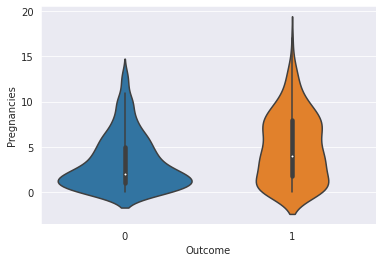

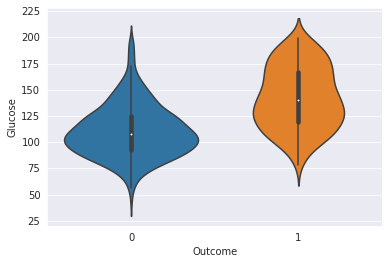

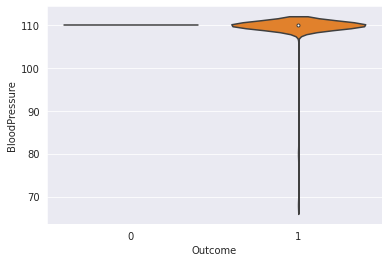

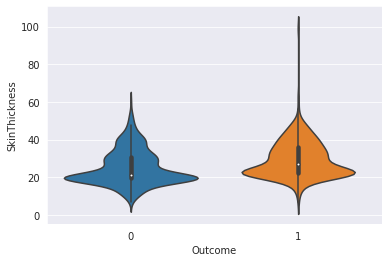

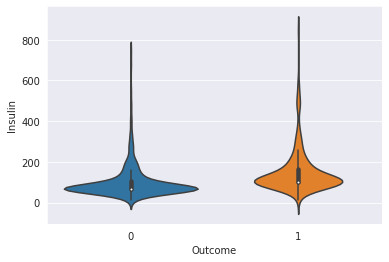

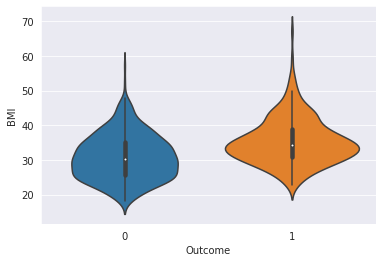

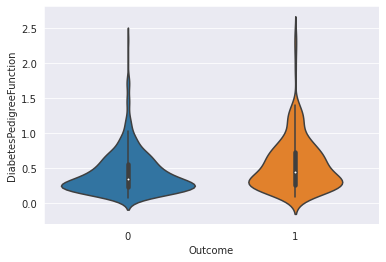

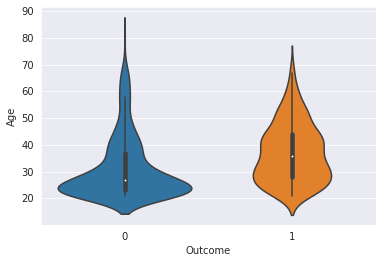

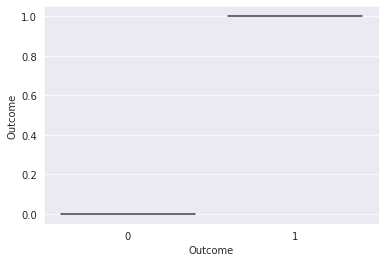

In [ ]:
for column in columns:
  violin(column)

### Model Fitting

> #### First let try to fit Decision Tree without any parameter tunning and see how it performs

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(data[columns[:-1]], data.iloc[:,-1], random_state=77)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_model = DecisionTreeClassifier()
dec_model.fit(x_train, y_train)
print("Train Accuracy: ", dec_model.score(x_train,y_train))
print("Test Accuracy: ", dec_model.score(x_test, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.8958333333333334


>> * It surely overfits the data
>> * But still 0.895 test accuracy is nice


> #### Decision Tree with parameter tunning

> * lets try to fit Decision Tree with parameter tunning it should perform better than without tunning

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini', 'entropy'],
          'max_depth': [5, 10, 20, 25, 30],
          'max_features': [3, 5, 7, 9],
          'max_leaf_nodes': [2,5,6, 9, 10, 15],
          'splitter': ['best', 'random']}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=10)
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Score: ", grid.best_score_)
#grid

{'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'max_leaf_nodes': 5, 'splitter': 'best'}
Score:  0.8958560193587417
CPU times: user 17.6 s, sys: 5.3 ms, total: 17.6 s
Wall time: 17.6 s


In [ ]:
grid.score(x_test, y_test)

0.859375

>> #### Visualize Tree

[Text(334.8, 489.24, 'X[4] <= 100.168\ngini = 0.462\nsamples = 576\nvalue = [367, 209]'),
 Text(167.4, 380.52000000000004, 'gini = 0.088\nsamples = 281\nvalue = [268, 13]'),
 Text(502.20000000000005, 380.52000000000004, 'X[4] <= 102.668\ngini = 0.446\nsamples = 295\nvalue = [99, 196]'),
 Text(334.8, 271.8, 'gini = 0.0\nsamples = 102\nvalue = [0, 102]'),
 Text(669.6, 271.8, 'X[1] <= 157.5\ngini = 0.5\nsamples = 193\nvalue = [99, 94]'),
 Text(502.20000000000005, 163.08000000000004, 'X[7] <= 28.5\ngini = 0.456\nsamples = 148\nvalue = [96, 52]'),
 Text(334.8, 54.360000000000014, 'gini = 0.258\nsamples = 79\nvalue = [67, 12]'),
 Text(669.6, 54.360000000000014, 'gini = 0.487\nsamples = 69\nvalue = [29, 40]'),
 Text(837.0, 163.08000000000004, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]')]

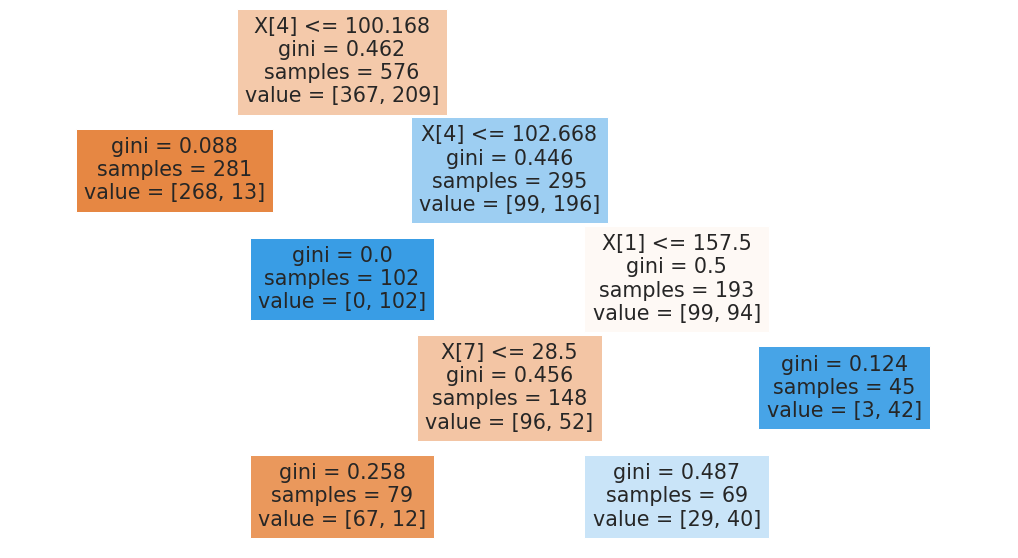

In [ ]:
from sklearn import tree
plt.figure(figsize=(18, 10))
tree.plot_tree(grid.best_estimator_, filled=True)

In [ ]:
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

>> ##### Feature Importances

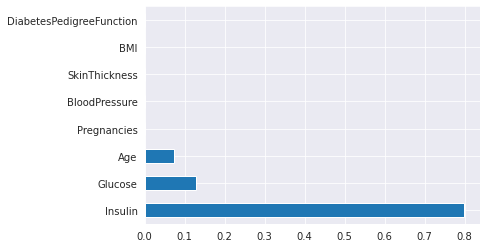

In [ ]:
pd.Series(grid.best_estimator_.feature_importances_, index=columns[:8]).nlargest(8).plot(kind='barh')


In [ ]:
x_train_updated = x_train[['Glucose', 'Age', 'Insulin']]
x_test_updated = x_test[['Glucose', 'Age', 'Insulin']]

params = {'criterion':['gini', 'entropy'],
          'max_depth': [5, 10, 20, 25, 30],
          'max_features': [3, 5, 7, 9],
          'max_leaf_nodes': [2,5,6, 9, 10, 15],
          'splitter': ['best', 'random']}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=10)
grid.fit(x_train_updated, y_train)
print(grid.best_params_)
print("Score: ", grid.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'max_leaf_nodes': 5, 'splitter': 'best'}
Score:  0.8993647912885663


In [ ]:
grid.score(x_test_updated, y_test)

0.859375

> #### Random Forest with Parameter tunning

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

params = params = {'criterion':['gini', 'entropy'],
          'max_depth': [5, 10, 20, 25, 30],
          'max_features': [3, 5, 7, 9],
          'max_leaf_nodes': [2,5,6, 9, 10, 15],
          #'splitter': ['best', 'random'],
          'n_estimators':[1,3,5,10]}
random_grid = GridSearchCV(RandomForestClassifier(), params, cv=10)
random_grid.fit(x_train, y_train)
print(random_grid.best_params_)
print(random_grid.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 10, 'n_estimators': 10}
0.9027828191167574
CPU times: user 1min 57s, sys: 374 ms, total: 1min 57s
Wall time: 1min 57s


In [ ]:
random_grid.score(x_test, y_test)

0.8802083333333334

In [ ]:
clf = random_grid.best_estimator_

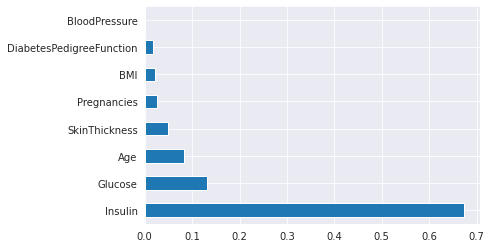

In [ ]:
pd.Series(random_grid.best_estimator_.feature_importances_, columns[:8]).nlargest(8).plot(kind='barh')

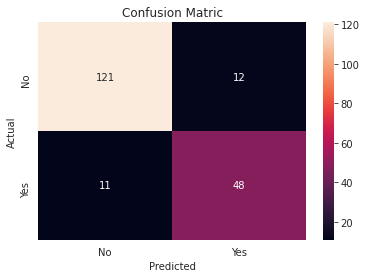

In [ ]:
from sklearn.metrics import confusion_matrix 
con_matrix = confusion_matrix(y_test, clf.predict(x_test))

sns.heatmap(con_matrix, annot=True, fmt='g')
plt.xticks([.5,1.5], ['No', 'Yes'])
plt.yticks([1.5,0.5],['Yes', 'No'],)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matric');

* Its perform Nice but let see we can make it better

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* let try to use ```class_weight``` parameters to be balanced

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

params = params = {'criterion':['gini', 'entropy'],
          'max_depth': [5, 10, 20, 25, 30],
          'max_features': [3, 5, 7, 9],
          'max_leaf_nodes': [2,5,6, 9, 10, 15],
          #'splitter': ['best', 'random'],
          'n_estimators':[1,3,5,10],
          'class_weight':['balanced']}
random_grid = GridSearchCV(RandomForestClassifier(), params, cv=10)
random_grid.fit(x_train, y_train)
print(random_grid.best_params_)
print(random_grid.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 6, 'n_estimators': 3}
0.897610405323654
CPU times: user 2min 1s, sys: 458 ms, total: 2min 1s
Wall time: 2min 1s


In [ ]:
random_grid.score(x_test, y_test)

0.8489583333333334

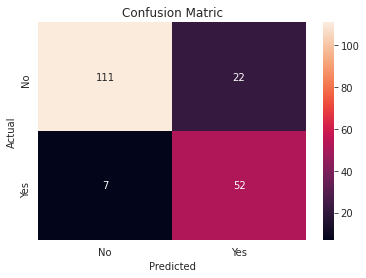

In [ ]:
clf = random_grid.best_estimator_
cmatrix = confusion_matrix(y_test,clf.predict(x_test))
sns.heatmap(cmatrix, annot=True, fmt='g')
plt.xticks([.5,1.5], ['No', 'Yes'])
plt.yticks([1.5,0.5],['Yes', 'No'],)
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('Confusion Matric');

* It didn't improved much

>> #### let first balance the data using resample technique and fit the model again 

In [ ]:
from sklearn.utils import resample, shuffle
data_pos = data[data.Outcome == 1]
data_neg = data[data.Outcome == 0]
data_pos = resample(data_pos, n_samples=500, random_state=34)
data1 = pd.concat([data_pos, data_neg], axis=0)
new_data = shuffle(data1, random_state=34)

In [ ]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,4.266000,125.340197,109.950020,27.266206,121.746584,33.101265,0.505530,34.35600,0.50000
std,3.555825,30.824284,0.948051,9.570933,88.977931,7.071080,0.351515,11.42873,0.50025
min,0.000000,44.000000,80.000000,7.000000,14.000000,18.200000,0.078000,21.00000,0.00000
25%,1.000000,101.750000,109.980000,19.664000,68.792000,27.800000,0.252000,25.00000,0.00000
50%,3.000000,122.000000,109.980000,24.000000,100.335821,32.700000,0.407500,31.00000,0.50000
75%,7.000000,146.000000,109.980000,33.000000,130.000000,37.225000,0.678000,42.00000,1.00000
max,15.000000,199.000000,109.980000,99.000000,744.000000,67.100000,2.420000,81.00000,1.00000


In [ ]:
x_train, x_test,y_train, y_test = train_test_split(new_data[columns[:-1]], new_data.iloc[:,-1], random_state=77)

> #### Random Forest on Balanced Dataset

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

params = params = {'criterion':['gini', 'entropy'],
          'max_depth': [5, 10, 20, 25, 30],
          'max_features': [3, 5, 7, 9],
          'max_leaf_nodes': [2,5,6, 9, 10, 15],
          #'splitter': ['best', 'random'],
          'n_estimators':[1,3,5,10]}
random_grid = GridSearchCV(RandomForestClassifier(), params, cv=10)
random_grid.fit(x_train, y_train)
print(random_grid.best_params_)
print(random_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 3, 'max_leaf_nodes': 15, 'n_estimators': 10}
0.9213333333333334
CPU times: user 2min, sys: 384 ms, total: 2min 1s
Wall time: 2min 1s


In [ ]:
random_grid.score(x_test, y_test)

0.904

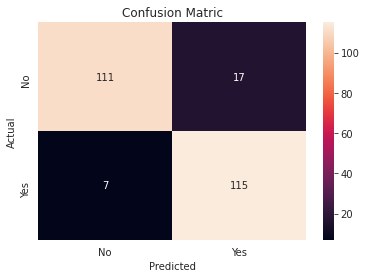

In [ ]:
clf = random_grid.best_estimator_
cmatrix = confusion_matrix(y_test,clf.predict(x_test))
sns.heatmap(cmatrix, annot=True, fmt='g')
plt.xticks([.5,1.5], ['No', 'Yes'])
plt.yticks([1.5,0.5],['Yes', 'No'],)
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('Confusion Matric');

* Its perform better than without balance
* let also try to fit one more model and see how it performs

> #### SVM on balance dataset

In [ ]:
%%time
from sklearn.svm import SVC
params = {'C':[0.5,1,10,100],
          'gamma':['scale', 1, 0.1,0.01, 0.001, 0.0001],
          'kernel':['rbf']}

grid = GridSearchCV(SVC(), params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9173333333333332
CPU times: user 5.76 s, sys: 5.98 ms, total: 5.77 s
Wall time: 5.77 s


In [ ]:
grid.score(x_test,y_test)

0.912

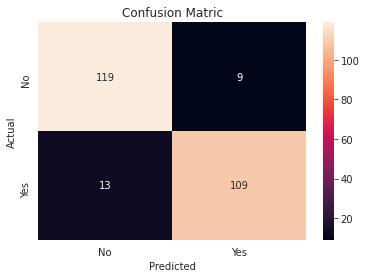

In [ ]:
cmatrix = confusion_matrix(y_test, grid.predict(x_test))
sns.heatmap(cmatrix, annot=True, fmt='g')
plt.xticks([.5,1.5], ['No', 'Yes'])
plt.yticks([1.5,0.5],['Yes', 'No'],)
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('Confusion Matric');

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 

In [ ]:
%%time
print("wwe")
from sklearn.svm import SVC
params = {'C':[0.5,1,10,100],
          'gamma':['scale', 1, 0.1,0.01, 0.001, 0.0001],
          'kernel':['rbf'],
          'class_weight':['balanced']}

grid = GridSearchCV(SVC(), params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

wwe
{'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.9173333333333332
CPU times: user 5.97 s, sys: 2.99 ms, total: 5.97 s
Wall time: 5.98 s


In [ ]:
grid.score(x_test,y_test)

0.912

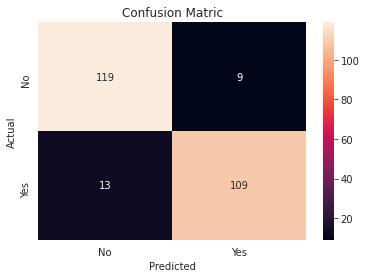

In [ ]:
cmatrix = confusion_matrix(y_test, grid.predict(x_test))
sns.heatmap(cmatrix, annot=True, fmt='g')
plt.xticks([.5,1.5], ['No', 'Yes'])
plt.yticks([1.5,0.5],['Yes', 'No'],)
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('Confusion Matric');

In [ ]:
print("wwe")
from sklearn.svm import SVC
params = {'C':[0.5,1,10,100],
          'gamma':['scale', 1, 0.1,0.01, 0.001, 0.0001],
          'kernel':['rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

wwe
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9173333333333332


In [ ]:
grid.score(x_test, y_test)

0.912

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, random_grid.predict(x_test), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.94      0.87      0.90       128
         Yes       0.87      0.94      0.91       122

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



In [ ]:
print(classification_report(y_test, grid.predict(x_test), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.90      0.93      0.92       128
         Yes       0.92      0.89      0.91       122

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



#### Conclusion:
>> * random Forest with balanced dataset performs better than unbalanced
>> * SVM doesn't performs better than Random Forest on balanced dataset
>> * Final 
  - Train Accuracy : 0.9173
  - Test Accuracy : 0.912
  - Precision : 0.87
  - Recall : 0.94